# Finding the Best markets to advertise

## Introduction

This project takes the scenario of an e-learning company that offers courses on programming and wants to invest some money in advertising. Specifically, most of the courses are on web and mobile development, with other types of courses in addition.

Goal: determine the two best markets for advertising investment. By markets, we will assume geographic location.

## Defining Research Questions

Given a population of coders intersted in courses taught by the company, our analysis should answer the following questions about that population:

* Where do they live (City, Country)?
* Among those locations, which ones have the greatest number of potential customers?
* How much money are those coders willing to spend on education?

## Data Acquisition

One option for acquiring the necssary data to make this decision, would be to organize our own survey. This approach has a few limitations:

* We may not be able to identify our own participants and get them to complete the survey
* Hiring a third party company could be expensive, especially if there may already be some data available to answer the question at the level it has been posed

For those reasons, we'll first investigate available data sets that might enable us to answer the questions.

One such data set was collected by Free Code Camp for a [2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). The data is available [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

# Exploratory Data Analysis

## Data Dictionary

The actual survey can be found [here](https://freecodecamp.typeform.com/report/N90qR4/SmY3)

The data dictionary it encoded in a json file [here](https://github.com/freeCodeCamp/2017-new-coder-survey/blob/master/clean-data/datapackage.json)

## Viewing the data

In [2]:
import pandas as pd

survey_df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
survey_df.columns

C:\Users\hrasheed\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo',
       'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation',
       'CodeEventConferences', 'CodeEventDjangoGirls',
       ...
       'YouTubeFCC', 'YouTubeFunFunFunction', 'YouTubeGoogleDev',
       'YouTubeLearnCode', 'YouTubeLevelUpTuts', 'YouTubeMIT',
       'YouTubeMozillaHacks', 'YouTubeOther', 'YouTubeSimplilearn',
       'YouTubeTheNewBoston'],
      dtype='object', length=136)

In [ ]:
survey_df.head(5)

## Selecting relevant columns for analysis

* CountryLive - might show which countries would be best for advertising investment
* CityPopulation
* JobInterestFrontEnd - Job Interest in Being a Front End Developer
* JobInterestFullStack - Job Interest in Being a Full Stack Developer
* JobInterestMobile - Job Interest in Being a Mobile Developer
* MoneyForLearning - Money Spent For Learning

## Appropriateness of Data set

* If the population is the set of **all** coders who might be intersted in one of the companies classes, then this data set would present a sample of that population.
* Unfortunately, the sampling was not random, but rather based on willingness to respond to a survey which would make the data set unlikely to be representative of the entire population

## Distribution of Data

* Goal: frequency distribution table for the JobRoleInterest 

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

survey_df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', dtype='unicode')
#survey_df.columns
interest_percentages = survey_df['JobRoleInterest'].value_counts(normalize = True)*100
print(interest_percentages.iloc[:10])


Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: JobRoleInterest, dtype: float64


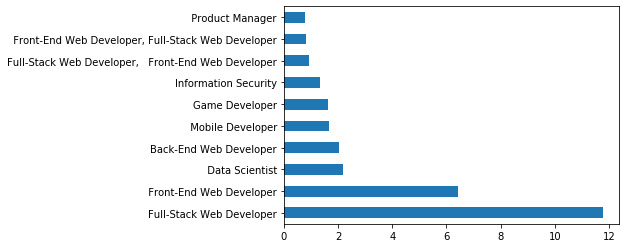

In [11]:
interest_percentages.iloc[:10].plot.barh(title='Top 10 Job Interest Combinations')

Errors indicate that the data requires some cleanup

In [13]:
survey_df.dropna(subset=['JobRoleInterest'],inplace=True)

In [17]:
survey_df['CountryLive'].value_counts()[:10]

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

In [16]:
survey_df['CountryLive'].value_counts(normalize=True)[:10]

United States of America    0.457005
India                       0.077216
United Kingdom              0.046066
Canada                      0.038023
Poland                      0.019158
Brazil                      0.018865
Germany                     0.018280
Australia                   0.016379
Russia                      0.014917
Ukraine                     0.013016
Name: CountryLive, dtype: float64

# Analysis So Far

At this point, the United States and India seem to have the greates numbers of people interested in our products. But considering where they are also willing to pay for our e-learning courses might change the ordering.

In [27]:
survey_df[survey_df['MonthsProgramming'] == NaN]

NameError: name 'NaN' is not defined

In [26]:
survey_df.astype({'MonthsProgramming':'int32'}).dtypes
#dtype(survey_df['MonthsProgramming'])

ValueError: cannot convert float NaN to integer